<a href="https://colab.research.google.com/github/Eugenia27/cuandoLlueve/blob/master/Copia_de_Cuando_Llueve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importacion de librerias

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import plotly.plotly as plo
import plotly.graph_objs as go
from scipy import stats
from matplotlib.ticker import NullFormatter,MultipleLocator, FormatStrFormatter
from google.colab import files
import datetime as dt

## Lectura de datos

In [0]:
lluvias = pd.read_csv("https://raw.githubusercontent.com/lprone/cuandoLlueve/master/Analisis%20y%20visualizacion/rain.csv", parse_dates = True, index_col="date" )

## Previsualización de datos

In [3]:
lluvias.rain.describe()

count    15034.000000
mean         3.331914
std         11.451975
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        220.000000
Name: rain, dtype: float64

In [0]:
lluvias2 = lluvias[lluvias.rain > 0]

In [5]:
lluvias2.rain.describe()

count    2459.000000
mean       20.370882
std        21.327274
min         1.000000
25%         5.000000
50%        13.000000
75%        28.000000
max       220.000000
Name: rain, dtype: float64

In [6]:
lluvias.head(13)

,rain
date,
1978-01-01,0
1978-01-02,0
1978-01-03,0
1978-01-04,0
1978-01-05,0
1978-01-06,0
1978-01-07,0
1978-01-08,0
1978-01-09,0


In [0]:
c5='#f66031'
c1='#ffba17'
c2='#17aeee'
c4='#8abe17'
c3='#233f63'

In [8]:
type(lluvias.index.values[0])

numpy.datetime64

In [9]:
lluvias.dtypes

rain    int64
dtype: object

In [10]:
(lluvias.index.max()-lluvias.index.min()).days+1

15034

## Grafico de datos

In [0]:
from matplotlib import rc

rc('font',**{'size':18})
plt.rc('legend', **{'fontsize': 15}) 
plt.rcParams['xtick.major.size'] = 8
plt.rcParams['xtick.minor.size'] = 4
plt.rcParams['ytick.major.size'] = 6
plt.rcParams['ytick.minor.size'] = 3
plt.rc('xtick', labelsize=15)    # fontsize of the tick labels
plt.rc('ytick', labelsize=15) 

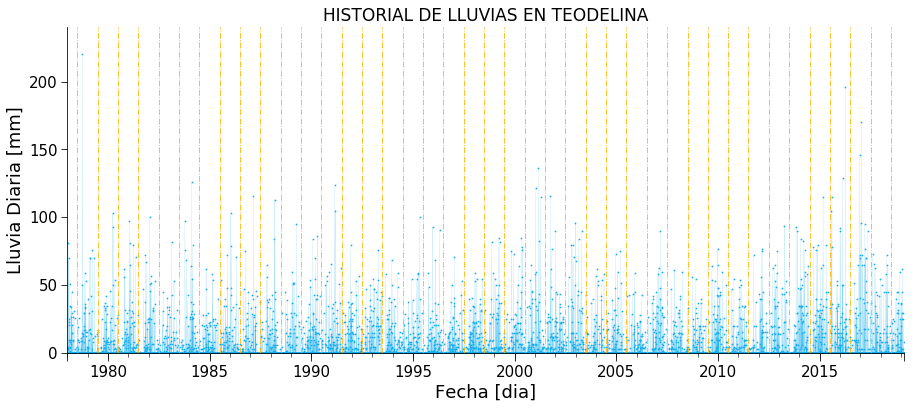

In [169]:
lluvias.rain.plot(figsize=(15,6),color=c2,lw=0.1,ls='-',marker='.',ms=1.5)
plt.xlabel('Fecha [dia]')
plt.ylabel('Lluvia Diaria [mm]')
plt.ylim(0,240)
for i in range(2019-1978):
  año = 1978+i
  plt.axvline(x=dt.datetime(año,7,1),ls='-.' ,color=c1,lw=0.9)

plt.title('HISTORIAL DE LLUVIAS EN TEODELINA',fontsize=17)  
sb.despine()
plt.savefig('datos.jpg',dpi=500,bbox_inches='tight')
files.download('datos.jpg')

## Ejercicios

Ej 1) 
Realizar analisis descriptivo de los datos. Describir variables, calcular estadísticos que se consideren apropiados,etc

Ej 2) 
Graficar variables

Ej 3)
Realizar test de normalidad

Ej 4) 
Realizar analisis de correlacion e independencia entre variables

Ej 5)
Elaborar conclusiones a partir de los resultados obtenidos en los puntos anteriores

In [0]:
lluvias['mes'] = lluvias.index.month
lluvias['año'] = lluvias.index.year
#lluvias['mesHid'] = (lluvias.index.month+5)%12+1
lluvias['añoHid'] = (lluvias.index + dt.timedelta(days=181))
lluvias['mesHid'] = lluvias.añoHid.dt.month

In [0]:
lluviasHid = lluvias[(lluvias.añoHid.dt.year>1978)&(lluvias.añoHid.dt.year<2019)]

In [17]:
lluvias[lluvias.rain.isna()==True]

,rain,mes,año,mesHid,añoHid
date,,,,,


In [0]:
dict_estaciones={
  1 : 1,
  2 : 1,
  3 : 2,
  4 : 2,
  5 : 2,
  6 : 3,
  7 : 3,
  8 : 3,
  9 : 4,
  10: 4,
  11: 4,
  12: 1}


In [0]:
lluvias['estacion'] = lluvias.mes.map(dict_estaciones)

In [0]:
def plotcxaños(_año,_xaños,_leg_bool):
  delta=0
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    delta+=0.04
    color = (1-delta,0.+delta,0+delta)
    plt.plot(lluvias_mes.index,lluvias_mes.values,marker='.',color=color,label=str(año))
    
  plt.ylim(0,400)
  if _leg_bool==True:
      plt.legend(bbox_to_anchor=(1.05, 0.9))

In [0]:
# vemos los datos por año
#fig = plt.figure(figsize=(12,8))
#ax=fig.add_subplot(221)
#plotcxaños(1978,10,False)
#ax=fig.add_subplot(222)
#plotcxaños(1988,10,False)
#ax=fig.add_subplot(223)
#plotcxaños(1998,10,False)
#ax=fig.add_subplot(224)
#plotcxaños(2008,10,True)

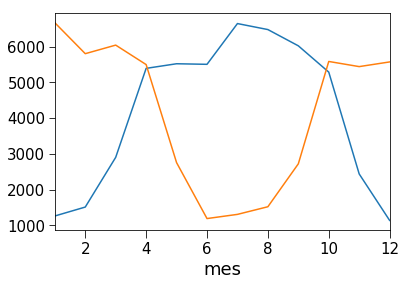

In [70]:
lluvias.groupby('mesHid').rain.sum().plot()
lluvias.groupby('mes').rain.sum().plot()

In [0]:
#lluvias[['rain']][lluvias.index.year<1982].plot(figsize=(15,6))

In [0]:

def grupos(_xaños,_año):
  paraMedianas = []
  for i in range(_xaños):
    año=_año+i
    lluvias_mes = lluvias[lluvias.año==año].groupby('mes').rain.sum()
    paraMedianas.append(lluvias_mes.values)
    
  return paraMedianas

In [0]:
xaños = 10
año   = 1978
medianas = grupos(xaños,año)

/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/__init__.py:424: MatplotlibDeprecationWarning:


Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.



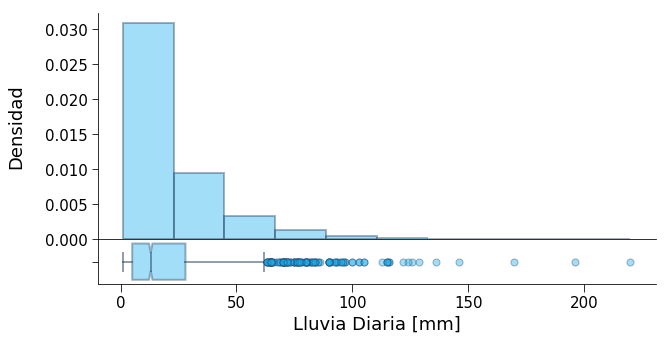

In [168]:

fig = plt.figure(figsize=(10,5))

ax = plt.subplot2grid((6,1), (5,0))
sb.boxplot(lluvias[lluvias.rain!=0].rain,notch=True,
           whiskerprops = dict(color =c3 ,linewidth=2,alpha=0.5),
           capprops     = dict(color =c3 ,linewidth=2,alpha=0.5),
           boxprops     = dict(color =c2 ,linewidth=2,alpha=0.4,edgecolor=c3),
           medianprops  = dict(color =c3 ,linewidth=2,alpha=0.5),
           flierprops   = dict(marker='o', markerfacecolor=c2, markersize=7 ,markeredgecolor=c3,alpha=0.4,lw=2),
           showfliers   = True)

plt.xlabel('Lluvia Diaria [mm]')
sb.despine(top=True, right=True, left=True, bottom=False)

ax = plt.subplot2grid((6,1), (0,0),rowspan=5)
plt.hist(lluvias[lluvias.rain>0].rain.values,color=c2,alpha=0.4,edgecolor=c3,density=True,lw=2)
sb.despine(top=True, right=True,bottom=False)
ax.xaxis.set_major_formatter(NullFormatter())
ax.tick_params(bottom="off")
plt.ylabel('Densidad', labelpad=20)

fig.subplots_adjust(hspace=0)
plt.savefig('boxhist.jpg',dpi=500,bbox_inches='tight')
files.download('boxhist.jpg')

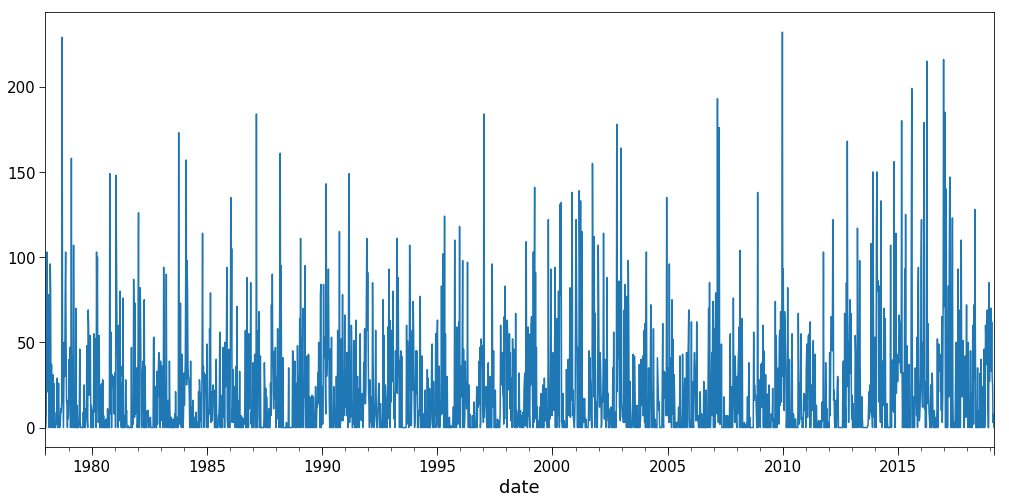

In [30]:
plt.figure(figsize=(17,8))
lluvias.rain.resample('W').sum().plot()

In [0]:
ll=pd.DataFrame(lluvias.rain.resample('Q', closed='left').sum())


90          AxesSubplot(0.1,0.679412;0.235294x0.220588)
91     AxesSubplot(0.382353,0.679412;0.235294x0.220588)
181    AxesSubplot(0.664706,0.679412;0.235294x0.220588)
182         AxesSubplot(0.1,0.414706;0.235294x0.220588)
273    AxesSubplot(0.382353,0.414706;0.235294x0.220588)
274    AxesSubplot(0.664706,0.414706;0.235294x0.220588)
365             AxesSubplot(0.1,0.15;0.235294x0.220588)
366        AxesSubplot(0.382353,0.15;0.235294x0.220588)
dtype: object

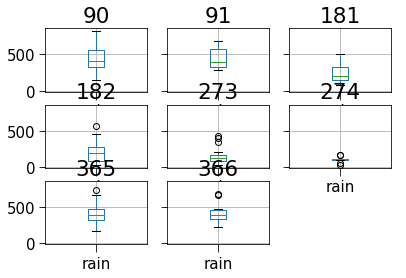

In [32]:
ll.groupby(ll.index.dayofyear).boxplot()

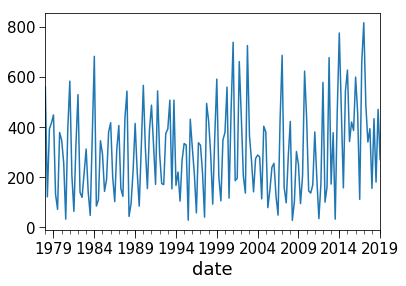

In [33]:
lluvias.rain.resample('Q', closed='left').sum().plot()

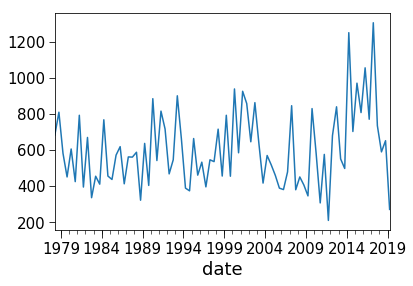

In [34]:
lluvias.rain.resample('2Q', closed='left').sum().plot()

In [0]:
medianasMensual = pd.pivot_table(lluvias[lluvias.rain!=0], values='rain', index=['año'],columns=['mes'], aggfunc=np.median)

In [0]:
sumas = pd.pivot_table(lluvias, values='rain', index=['año'],columns=['mes'], aggfunc=np.sum,margins=True)

In [0]:
sumas_short = sumas.drop(['All'], axis=1)
sumas_short = sumas_short.drop([2019,'All'], axis=0)

In [0]:
serie_mensual = lluvias.groupby([lluvias.mes,lluvias.año]).rain.sum().reset_index().sort_values(['año','mes'])

In [0]:
serie_mensual['date'] = pd.to_datetime(serie_mensual.año.astype(str)+'-'+serie_mensual.mes.astype(str)+'-1')

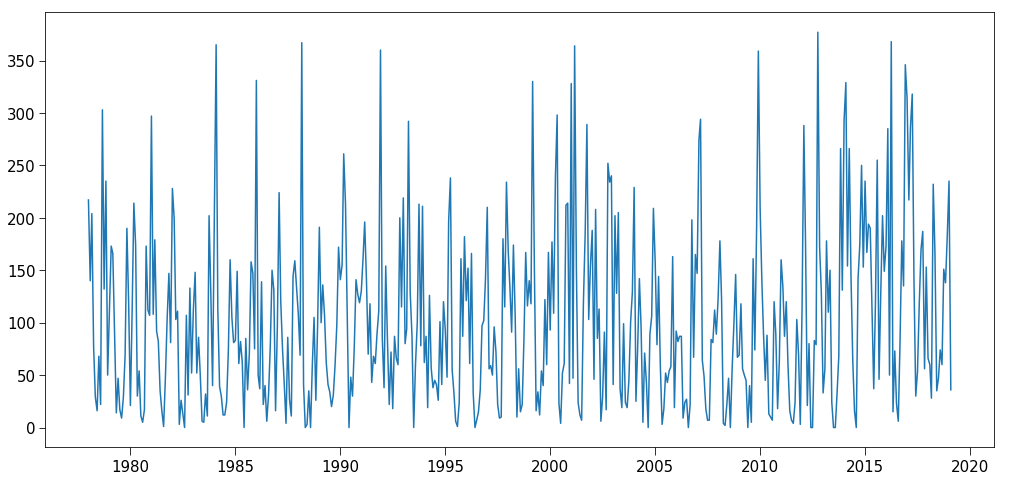

In [40]:
plt.figure(figsize=(17,8))
plt.plot(serie_mensual.date,serie_mensual.rain)


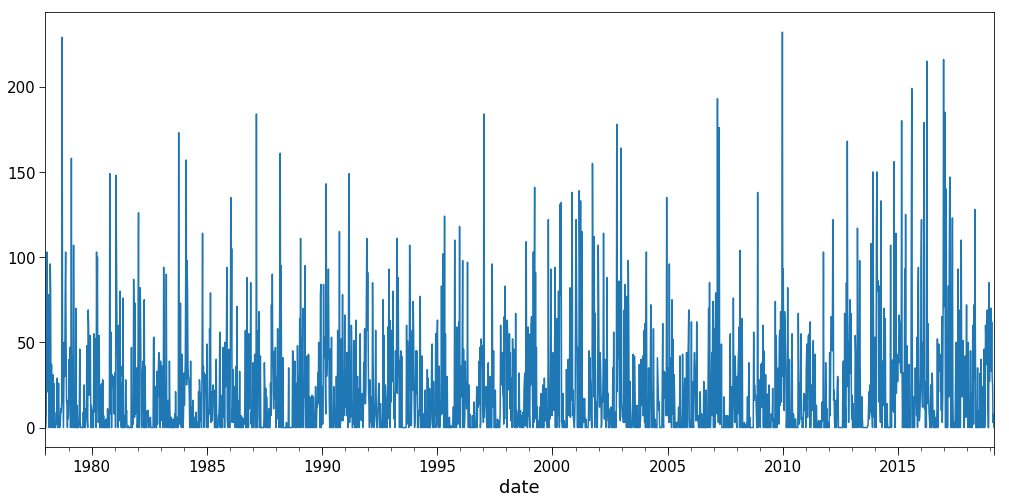

In [41]:
plt.figure(figsize=(17,8))
lluvias.rain.resample('W').sum().plot()

In [0]:
sumas_stats = sumas_short.describe()
sumas_stats.loc['bigInf'] = sumas_stats.loc['25%']-(sumas_stats.loc['75%']-sumas_stats.loc['25%'])*1.5
sumas_stats.loc['bigSup'] = sumas_stats.loc['75%']+(sumas_stats.loc['75%']-sumas_stats.loc['25%'])*1.5

In [43]:
sumas_stats

mes,1,2,3,4,5,6,7,8,9,10,11,12
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,156.926829,140.658537,147.390244,134.097561,67.146341,28.951220,31.804878,37.024390,66.317073,136.219512,132.707317,135.902439
std,81.749125,82.812925,90.112951,84.687899,58.814352,26.821588,29.552681,47.985669,58.956526,70.030533,60.129961,84.908423
min,21.000000,25.000000,19.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,31.000000,18.000000,3.000000
25%,93.000000,79.000000,87.000000,77.000000,24.000000,10.000000,7.000000,5.000000,24.000000,89.000000,101.000000,81.000000
50%,141.000000,134.000000,128.000000,111.000000,55.000000,23.000000,22.000000,24.000000,56.000000,128.000000,127.000000,129.000000
75%,210.000000,177.000000,196.000000,174.000000,96.000000,38.000000,47.000000,52.000000,79.000000,174.000000,167.000000,167.000000
max,331.000000,365.000000,367.000000,368.000000,298.000000,118.000000,120.000000,255.000000,303.000000,377.000000,266.000000,360.000000
bigInf,-82.500000,-68.000000,-76.500000,-68.500000,-84.000000,-32.000000,-53.000000,-65.500000,-58.500000,-38.500000,2.000000,-48.000000
bigSup,385.500000,324.000000,359.500000,319.500000,204.000000,80.000000,107.000000,122.500000,161.500000,301.500000,266.000000,296.000000


In [0]:
tabla_acum = sumas[['All']]

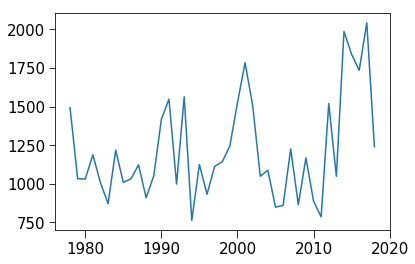

In [45]:
#serie temporal acumuladas anuales
plt.plot(tabla_acum[(tabla_acum.index.isin(['All',2019]))==False]) 

In [0]:
tabla_acum = tabla_acum[(tabla_acum.index.isin(['All',2019]))==False] 

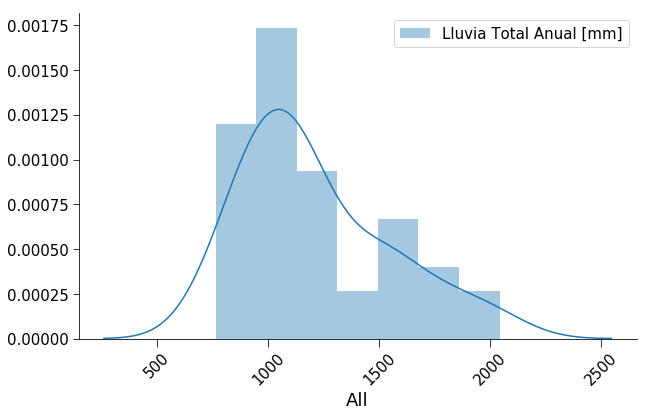

In [47]:
#distribucion acumuladas anual
plt.figure(figsize=(10,6))
sb.distplot(tabla_acum['All'], bins=7, label='Lluvia Total Anual [mm]')
plt.xticks(rotation=45)
plt.legend()
sb.despine()

In [48]:
x1 = tabla_acum.All
m1 = x1.mean()
s1 = x1.std()
l1 = len(x1)

stats.kstest(x1, 'norm', args=(m1, s1), N=l1)

KstestResult(statistic=0.17275048293810236, pvalue=0.15367932241354818)

 (Javi: este comentario no va, estaba mal hecho el KS test)
Como los p-valores obtenidos son menores que el nivel de significancia (alpha = 0.05), concluimos que podemos rechazar la hipótesis nula que establece que la variable lluvia total anual sigue una distribución normal.

In [49]:
x         = tabla_acum.All.values
media     = x.mean()
std       = x.std()
zstandar  = (x-media)/std

stats.kstest(zstandar,'norm')

KstestResult(statistic=0.17232216416637558, pvalue=0.15561374628215202)

In [0]:
#!pip install -U scikit-learn
#!pip install -U scikit-plot

Bajo un 5% de significancia, no se puede rechazar la hipótesis nula. Dado que el KS en pequeño 

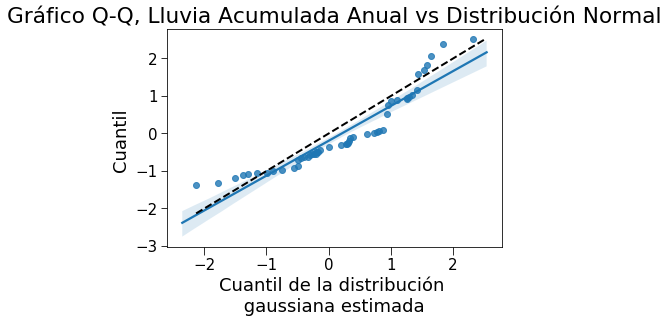

In [51]:
x        = tabla_acum.All.values
media    = x.mean()
std      = x.std()

zstadar  = (x-media)/std
variable  = zstadar
mu, sigma = stats.norm.fit(variable)
norm_dist = stats.norm(mu, sigma)
muestra   = norm_dist.rvs(10000)

percentiles         = np.linspace(0,100,51)  
qn_cuantiles        = np.percentile(variable, percentiles)
qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)

sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles)
plt.ylabel('Cuantil ')
plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
plt.title('Gráfico Q-Q, Lluvia Acumulada Anual vs Distribución Normal')

x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
plt.plot(x,x, color='black', ls="--",lw=2)

In [0]:
tabla_acum['año']=tabla_acum.index

In [0]:
tabla_acum.año = tabla_acum.año.astype(float)

In [54]:
tabla_acum.dtypes

mes
All      int64
año    float64
dtype: object

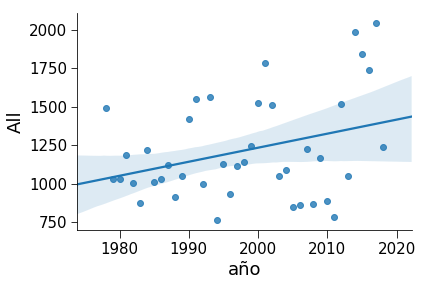

In [55]:
sb.regplot(x='año', y='All', data=tabla_acum)
sb.despine()

In [0]:
# con ceros

#fig = plt.figure(figsize=(20,20))
#meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
#for i in range(13):
#  if i==0: continue
#  ax=fig.add_subplot(4,3,i)
#  sb.distplot(sumas[sumas[i]<sumas_stats.loc['bigSup'][i]][i], bins=7, label=meses[i-1])
#  plt.xticks(rotation=45)
#  plt.legend()
#  sb.despine()
  

In [0]:
sumas_short.index = sumas_short.index.astype(float)

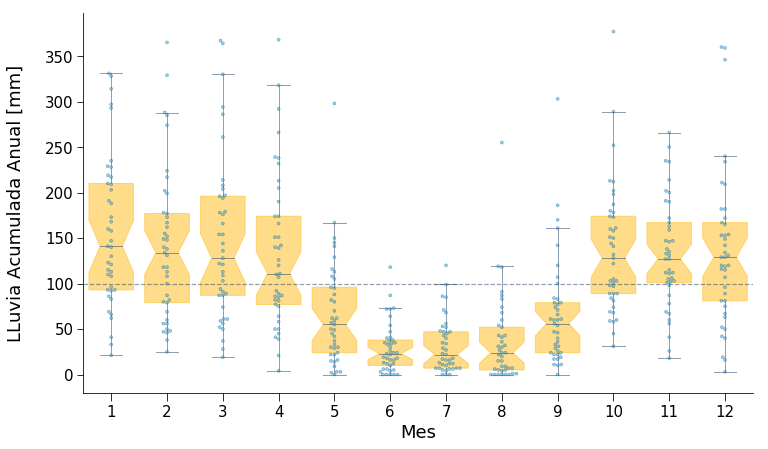

In [57]:
plt.figure(figsize=(12,7))
#sb.boxplot(data=sumas_short,notch=True,color='lightgray')

sb.boxplot(data=sumas_short,notch=True,
           whiskerprops = dict(color    =c3 ,linewidth=1,alpha=0.5),
           capprops     = dict(color    =c3 ,linewidth=1,alpha=0.5),
           boxprops     = dict(color    =c1 ,linewidth=1,alpha=0.5),
           medianprops  = dict(color    =c3 ,linewidth=1,alpha=0.5),
           showfliers   = False)
  
sb.swarmplot(data=sumas_short,color =c2 , size =3 , edgecolor =c3 , linewidth=0.5,alpha=0.5)

sb.despine()
plt.hlines(y=100,xmin=-0.5,xmax=12.5,linestyles='--',lw=1.2,colors=c3,alpha=0.5)

plt.xlabel('Mes')
plt.ylabel('LLuvia Acumulada Anual [mm]', labelpad=20)


plt.savefig('boxplotanual.jpg',dpi=500,bbox_inches='tight')
#files.download('boxplotanual.jpg')


Podemos definir dos grupos: meses con acum>50 

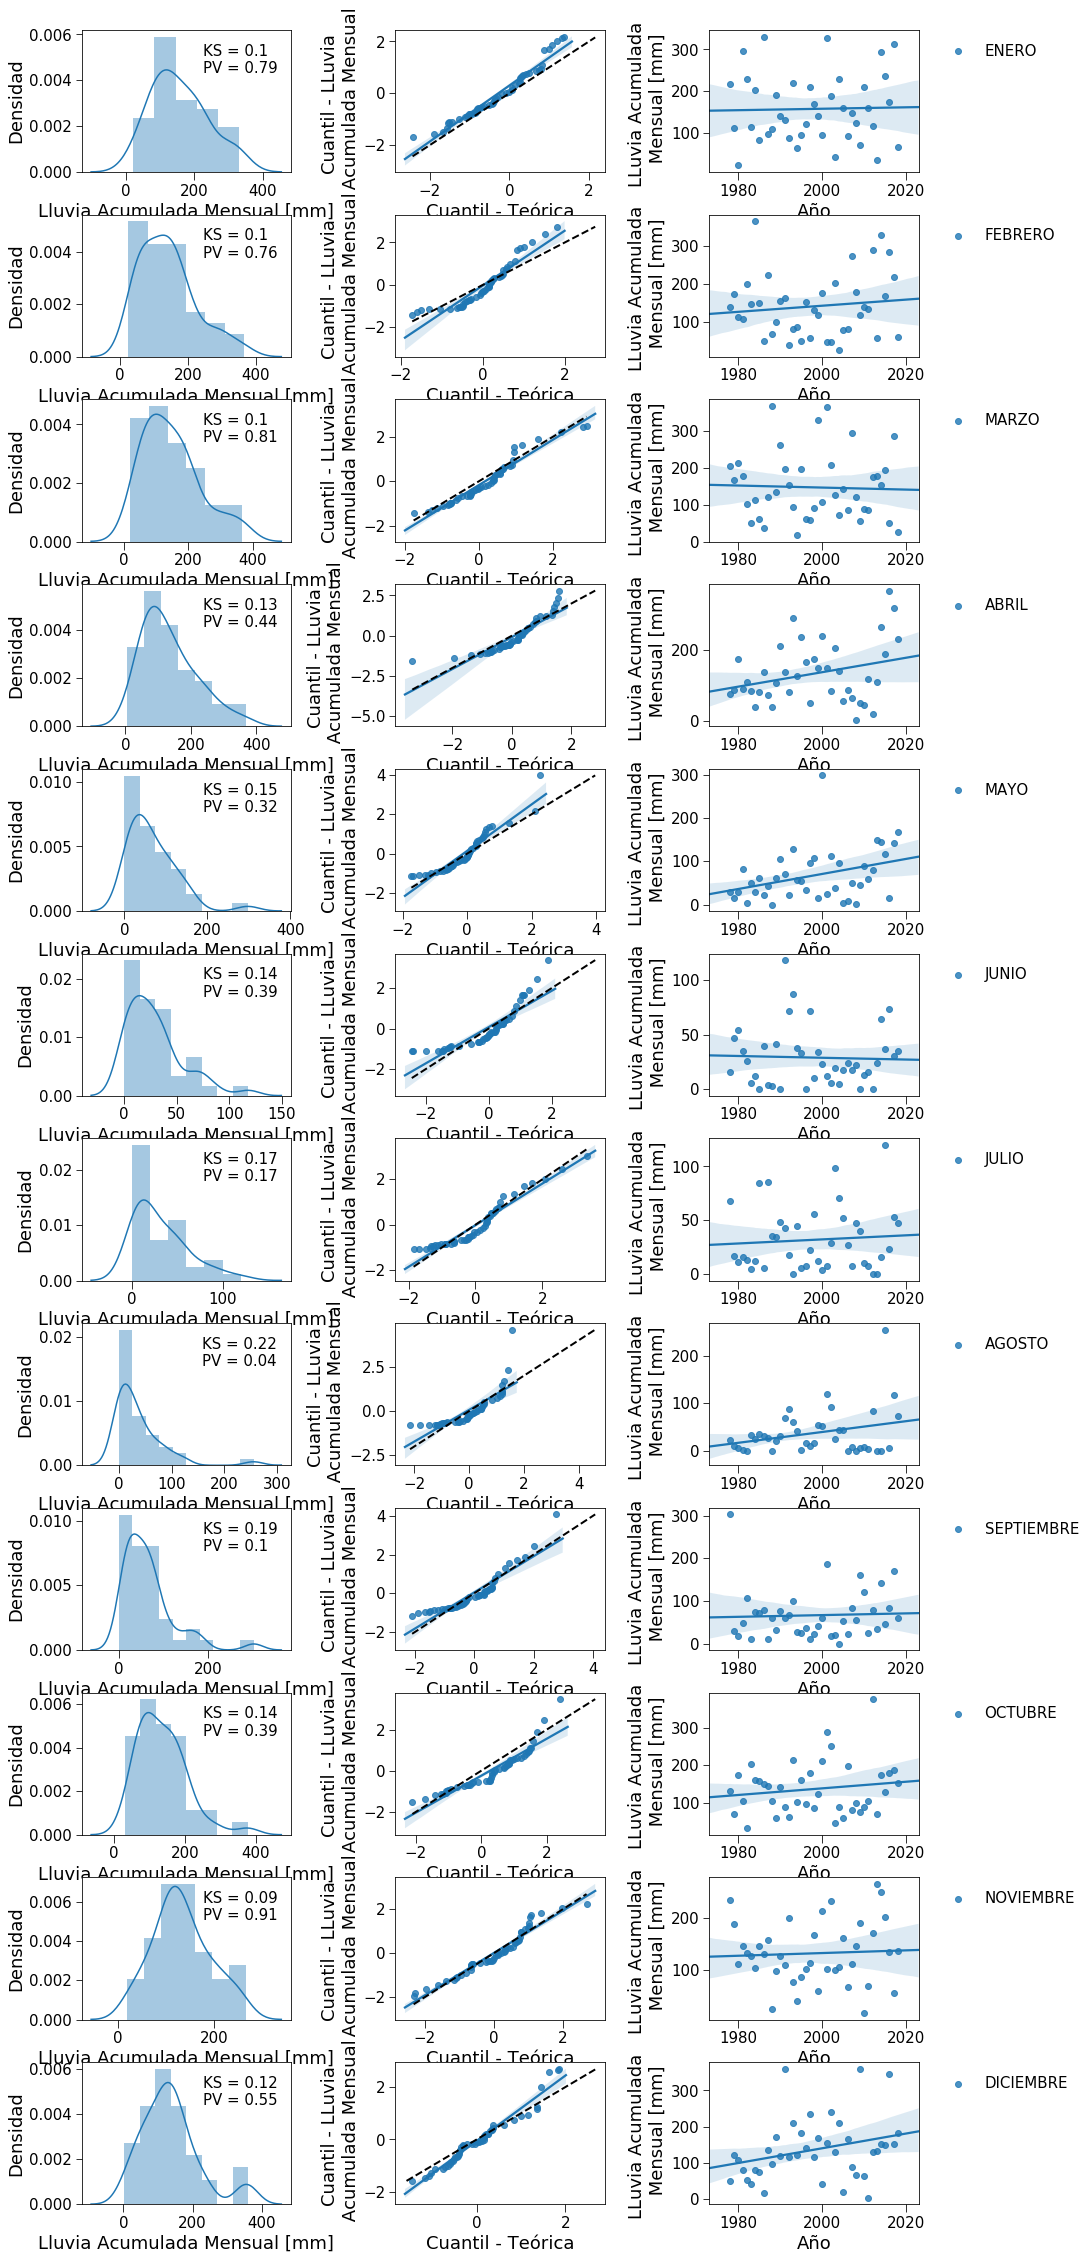

In [58]:
ktestXmes=[]
fig = plt.figure(figsize=(15,40))
meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
p=0
for i in range(13):
  if i==0: continue
    
  x        = sumas_short[i].values
  media    = x.mean()
  std      = x.std()
  zstadar  = (x-media)/std
  ks       = stats.kstest(zstadar, 'norm')
  ktestXmes.append(ks)
  
  p+=1
  ax=fig.add_subplot(12,3,p)
  #sb.distplot(sumas_short[(sumas_short[i]<sumas_stats.loc['bigSup'][i])&(sumas_short[i]!=0)][i], 
  sb.distplot(sumas_short[i], 
              label='KS = '+str(round(ks[0],2))+'\nPV = '+str(round(ks[1],2)))
  plt.legend(frameon=False,handlelength=0, handletextpad=0)
  plt.xlabel('Lluvia Acumulada Mensual [mm]')
  plt.ylabel('Densidad')
  
  

  
  p+=1
  ax=fig.add_subplot(12,3,p)
  variable  = zstadar
  mu, sigma = stats.norm.fit(variable)
  norm_dist = stats.norm(mu, sigma)
  muestra   = norm_dist.rvs(10000)
  percentiles         = np.linspace(0,100,51)  
  qn_cuantiles        = np.percentile(variable, percentiles)
  qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)
  sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles, label=meses[i-1])
  plt.ylabel('Cuantil - LLuvia \n Acumulada Mensual')
  plt.xlabel('Cuantil - Teórica')
  #plt.title('Gráfico Q-Q, Lluvia Acumulada Anual vs Distribución Normal')
  
  x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
  plt.plot(x,x, color='black', ls="--",lw=2)
  #plt.legend(frameon=False)
  
  p+=1
  ax=fig.add_subplot(12,3,p)
  sb.regplot(x='año',y=str(i),data=pd.DataFrame(sumas_short.loc(axis=1)[i]).reset_index().rename(columns=lambda x: str(x)),label=meses[i-1])
  plt.legend(frameon=False,bbox_to_anchor=(1.05, 1), loc=2)
  plt.ylabel('LLuvia Acumulada \n Mensual [mm]')
  plt.xlabel('Año')
  
  
  
fig.subplots_adjust(wspace=0.5, hspace=0.3)

In [0]:
#fig = plt.figure(figsize=(20,20))
#meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
#for i in range(13):
#  if i==0: continue
#  ax=fig.add_subplot(4,3,i)
#  x = sumas_short[i].values
#  media    = x.mean()
#  std      = x.std()
#  zstadar  = (x-media)/std
#  variable  = zstadar
#  mu, sigma = stats.norm.fit(variable)
#  norm_dist = stats.norm(mu, sigma)
#  muestra   = norm_dist.rvs(10000)
#  
#  percentiles         = np.linspace(0,100,51)  
#  qn_cuantiles        = np.percentile(variable, percentiles)
#  qn_cuantiles_normal = np.percentile(norm_dist.rvs(len(variable)), percentiles)
#  
#  sb.regplot(x=qn_cuantiles_normal, y=qn_cuantiles)
#  #plt.ylabel('Cuantil ')
#  #plt.xlabel('Cuantil de la distribución \n gaussiana estimada ')
#  #plt.title('Gráfico Q-Q, Lluvia Acumulada Anual vs Distribución Normal')
  
#  x = np.linspace(np.min((qn_cuantiles.min(), qn_cuantiles_normal.min())), np.max((qn_cuantiles.max(),qn_cuantiles_normal.max())))
#  plt.plot(x,x, color='black', ls="--",lw=2)

In [0]:
#fig = plt.figure(figsize=(20,20))
#meses=['ENERO','FEBRERO','MARZO','ABRIL','MAYO','JUNIO','JULIO','AGOSTO','SEPTIEMBRE','OCTUBRE','NOVIEMBRE','DICIEMBRE']
#for i in range(13):
#  if i==0: continue
#  ax=fig.add_subplot(4,3,i)
#  sb.regplot(x='año',y=str(i),data=pd.DataFrame(sumas_short.loc(axis=1)[i]).reset_index().rename(columns=lambda x: str(x)),label=meses[i-1])
#  plt.xticks(rotation=45)
#  plt.legend()
#  sb.despine()

In [0]:
sumas_short_copy = sumas_short.copy()

In [0]:
sumas_short_copy['temporada_seca'] = sumas_short_copy[[5,6,7,8,9]].sum(axis=1)
#sumas_short_copy['temporada_media'] = sumas_short_copy[[5,9]].sum(axis=1)
sumas_short_copy['temporada_humeda'] = sumas_short_copy[[1,2,3,4,10,11,12]].sum(axis=1)

Text(0.5, 0, 'Lluvia Acumulada Anual por Temporada [mm]')

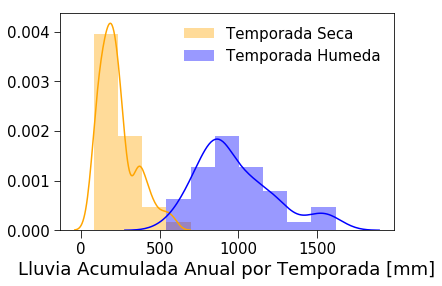

In [63]:
rgmin = np.min([sumas_short_copy.temporada_humeda.min(),sumas_short_copy.temporada_seca.min()])
rgmax = np.max([sumas_short_copy.temporada_humeda.max(),sumas_short_copy.temporada_seca.max()])


sb.distplot(sumas_short_copy.temporada_seca   ,bins=10, color ='orange', hist_kws={'range': (rgmin,rgmax)},label='Temporada Seca')
sb.distplot(sumas_short_copy.temporada_humeda ,bins=10, color ='blue'  , hist_kws={'range': (rgmin,rgmax)},label='Temporada Humeda')
plt.legend(frameon=False)
plt.xlabel('Lluvia Acumulada Anual por Temporada [mm]')

In [0]:
paleta = sb.light_palette((210, 90, 60), input="husl")


In [0]:
def box(mayor,menor):
  sb.boxplot(data=sumas_short[(sumas_short.index<=mayor)&(sumas_short.index>=menor)],
           whiskerprops = dict(color    =c3 ,linewidth=1,alpha=0.5),
           capprops     = dict(color    =c3 ,linewidth=1,alpha=0.5),
           boxprops     = dict(color    =c1 ,linewidth=1,alpha=0.5),
           medianprops  = dict(color    =c3 ,linewidth=1,alpha=0.5),
           showfliers   = False, notch=True)
  
  sb.swarmplot(data=sumas_short[(sumas_short.index<=mayor)&(sumas_short.index>=menor)],
               color =c2 , size =3 , edgecolor =c3 , linewidth=0.5,alpha=0.5)
  
  plt.ylim(-80,480)
  

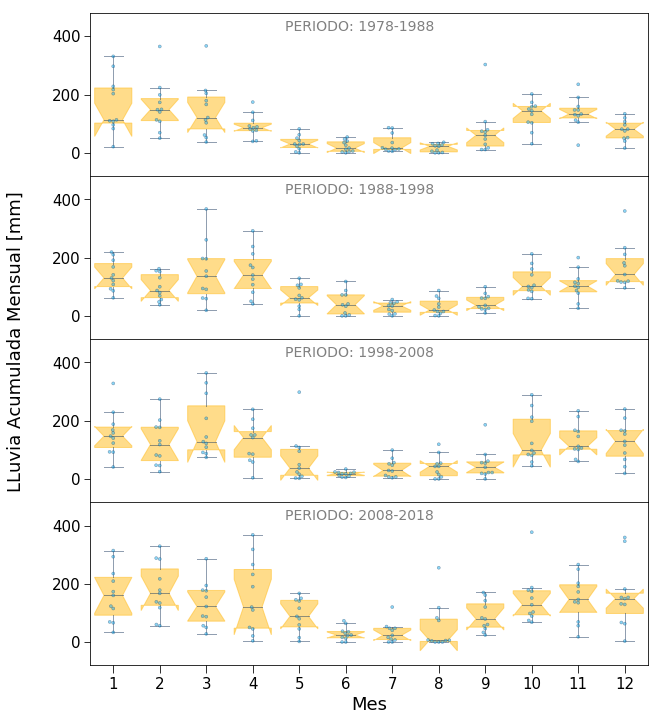

In [66]:
fig = plt.figure(figsize=(10,12))

x=3.7
y=420
fs= 14
ca='grey'

ax = fig.add_subplot(411)
menor=1978
mayor=1988
box(mayor,menor)
plt.annotate('PERIODO: '+str(menor)+'-'+str(mayor),xy=(x,y),fontsize=fs,color=ca)


ax = fig.add_subplot(412)
menor=1988
mayor=1998
box(mayor,menor)
plt.annotate('PERIODO: '+str(menor)+'-'+str(mayor),xy=(x,y),fontsize=fs,color=ca)
 
  
ax = fig.add_subplot(413)
menor=1998
mayor=2008
box(mayor,menor)
plt.annotate('PERIODO: '+str(menor)+'-'+str(mayor),xy=(x,y),fontsize=fs,color=ca)


ax = fig.add_subplot(414)
menor=2008
mayor=2018
box(mayor,menor)
plt.annotate('PERIODO: '+str(menor)+'-'+str(mayor),xy=(x,y),fontsize=fs,color=ca)
#yticks = ax.yaxis.get_major_ticks()
#yticks[0].label1.set_visible(False)


plt.xlabel('Mes')
fig.text(0.01, 0.5, 'LLuvia Acumulada Mensual [mm]', va='center', rotation='vertical')

fig.subplots_adjust(wspace=0.0,hspace=0.0)

plt.savefig('boxplotdecadas.jpg',dpi=500,bbox_inches='tight')

#files.download('boxplotdecadas.jpg')

In [67]:
medianas = []
bigInfs  = []
bigSups  = []

for i in range(4):
  añoInicial=1978+i*10
  añoFinal=añoInicial+9
  #print(añoInicial,añoFinal)
  subTabla = sumas_short[(sumas_short.index<=añoFinal)&(sumas_short.index>=añoInicial)]
  describeST = subTabla.describe()
  #print(subTabla.describe())
  describeST.loc['bigInf'] = describeST.loc['25%']-(describeST.loc['75%']-describeST.loc['25%'])*1.5
  describeST.loc['bigSup'] = describeST.loc['75%']+(describeST.loc['75%']-describeST.loc['25%'])*1.5
  medianas.append(describeST.loc['50%'])
  bigInfs.append(describeST.loc['bigInf'])
  bigSups.append(describeST.loc['bigSup']) 
  print(describeST)
  

mes             1           2           3   ...          10          11          12
count    10.000000   10.000000   10.000000  ...   10.000000   10.000000   10.000000
mean    169.900000  166.900000  125.000000  ...  132.200000  148.600000   75.600000
std     100.447277   84.992091   63.746024  ...   51.120337   38.804925   37.205734
min      21.000000   50.000000   37.000000  ...   31.000000  105.000000   16.000000
25%      99.500000  119.750000   71.500000  ...  110.250000  128.000000   50.500000
50%     158.000000  148.500000  117.000000  ...  147.000000  140.000000   78.000000
75%     225.250000  192.500000  175.750000  ...  159.500000  156.000000  100.500000
max     331.000000  365.000000  214.000000  ...  202.000000  235.000000  134.000000
bigInf  -89.125000   10.625000  -84.875000  ...   36.375000   86.000000  -24.500000
bigSup  413.875000  301.625000  332.125000  ...  233.375000  198.000000  175.500000

[10 rows x 12 columns]
mes             1           2           3   ...     

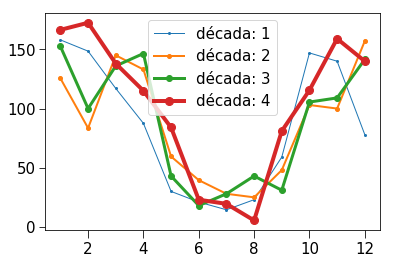

In [68]:
for i in range(4):
  plt.plot(medianas[i],marker='o',ms=2*(i+1),label='década: '+str(i+1),lw=1*(i+1))
plt.legend()